In [1719]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import seaborn as sns

In [1720]:
df = pd.read_csv('train.csv')

In [1721]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [1722]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [1723]:
df.shape

(10886, 12)

In [1724]:
df.humidity.unique()

array([ 81,  80,  75,  86,  76,  77,  72,  82,  88,  87,  94, 100,  71,
        66,  57,  46,  42,  39,  44,  47,  50,  43,  40,  35,  30,  32,
        64,  69,  55,  59,  63,  68,  74,  51,  56,  52,  49,  48,  37,
        33,  28,  38,  36,  93,  29,  53,  34,  54,  41,  45,  92,  62,
        58,  61,  60,  65,  70,  27,  25,  26,  31,  73,  21,  24,  23,
        22,  19,  15,  67,  10,   8,  12,  14,  13,  17,  16,  18,  20,
        85,   0,  83,  84,  78,  79,  89,  97,  90,  96,  91], dtype=int64)

In [1725]:
# df2 = pd.read_csv('test.csv')
# df2.tail()

In [1726]:
df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-10-06 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [1727]:
#Since date is not a ver viable entity for predicting the number of bikes sold, we'll only extract the month  from the date
new = df["datetime"].str.split(" ", n=1, expand=True)
df["Date"] = new[0]
df["Time"] = new[1]

In [1728]:
df.drop(columns=["datetime"], inplace= True)

In [1729]:
new = df["Date"].str.split("-", n=2, expand=True)
df["Month"] = new[1]

In [1730]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,Time,Month
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00,01
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00,01
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00,01
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00,01
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00,01


In [1731]:
df.drop(columns=["Date"], inplace= True)

In [1732]:
#Extracting the value of the hour when the bike is rented. This would give us an idea regarding the part of the day when most of the bikes are rented - morning, noon, evening
new = df["Time"].str.split(":", n=2, expand=True)
df["Hour"] = new[0]
df.drop(columns=["Time"], inplace= True)

In [1733]:
#one hot encoding of season and weather
df = pd.get_dummies(df, columns=['season', 'weather'], drop_first=True)

In [1734]:
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,Month,Hour,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0,3,13,16,01,00,0,0,0,0,0,0
1,0,0,9.02,13.635,80,0.0,8,32,40,01,01,0,0,0,0,0,0
2,0,0,9.02,13.635,80,0.0,5,27,32,01,02,0,0,0,0,0,0
3,0,0,9.84,14.395,75,0.0,3,10,13,01,03,0,0,0,0,0,0
4,0,0,9.84,14.395,75,0.0,0,1,1,01,04,0,0,0,0,0,0


In [1735]:
df = df.rename(columns={'season_2':'season_summer', 'season_3':'season_fall', 'season_4':'season_winter'})

## Correlation

In [1737]:
#Calculating the correlation between probable correlated variables
a = np.asarray(df['count'])
b = np.asarray(df['windspeed'])

In [1738]:
corr, p_value = pearsonr(a,b)
print(corr)
print(p_value)

0.10136947021033278
2.898407203166937e-26


In [1739]:
#Since temp and atemp are highly correlated we make another column 'temp' having the value of (temp+atemp)/2 and drop the original temp and atemp
df['temp']= (df['temp'] + df['atemp'])/2

In [1740]:
df.drop(columns=['atemp'], inplace=True)

In [1741]:
df.windspeed.unique()

array([ 0.    ,  6.0032, 16.9979, 19.0012, 19.9995, 12.998 , 15.0013,
        8.9981, 11.0014, 22.0028, 30.0026, 23.9994, 27.9993, 26.0027,
        7.0015, 32.9975, 36.9974, 31.0009, 35.0008, 39.0007, 43.9989,
       40.9973, 51.9987, 46.0022, 50.0021, 43.0006, 56.9969, 47.9988])

In [1742]:
df.drop(columns=['casual','registered'], inplace=True)

In [1743]:
df['Month'] = df['Month'].astype('int')
df['Hour'] = df['Hour'].astype('int')

In [1744]:
for col in ['holiday', 'workingday', 'season_summer', 'season_fall','season_winter', 'weather_2', 'weather_3', 'weather_4']:
    df[col] = df[col].astype('category')

In [1745]:
df['Hour']


0         0
1         1
2         2
3         3
4         4
5         5
6         6
7         7
8         8
9         9
10       10
11       11
12       12
13       13
14       14
15       15
16       16
17       17
18       18
19       19
20       20
21       21
22       22
23       23
24        0
25        1
26        2
27        3
28        4
29        6
         ..
10856    18
10857    19
10858    20
10859    21
10860    22
10861    23
10862     0
10863     1
10864     2
10865     3
10866     4
10867     5
10868     6
10869     7
10870     8
10871     9
10872    10
10873    11
10874    12
10875    13
10876    14
10877    15
10878    16
10879    17
10880    18
10881    19
10882    20
10883    21
10884    22
10885    23
Name: Hour, Length: 10886, dtype: int32

## Visualization

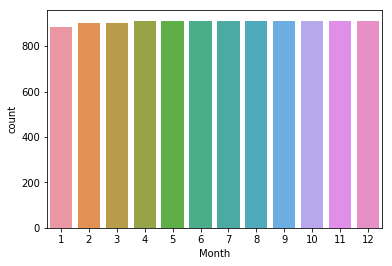

In [1746]:
sns.countplot(x='Month', data=df)
#Uniformly distributed over months

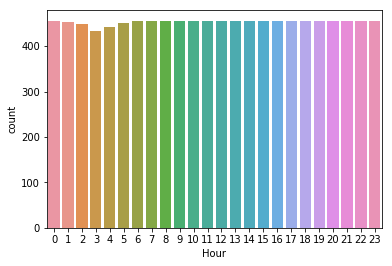

In [1747]:
sns.countplot(x='Hour', data=df)
#uniformly distributed over hour of the day

In [1748]:
# df.loc[ df['Month'] <= 4, 'Month'] = 0
# df.loc[(df['Month'] > 4) & (df['Month'] <= 8), 'Month'] = 1
# df.loc[ df['Month'] > 8, 'Month'] = 2

In [1749]:
# df.loc[ df['Hour'] <= 5, 'Hour'] = 0
# df.loc[(df['Hour'] > 5) & (df['Hour'] <= 11), 'Hour'] = 1
# df.loc[(df['Hour'] > 11) & (df['Hour'] <= 17), 'Hour'] = 2
# df.loc[ df['Hour'] > 17, 'Hour'] = 3

In [1750]:
df.head()

,holiday,workingday,temp,humidity,windspeed,count,Month,Hour,season_summer,season_fall,season_winter,weather_2,weather_3,weather_4
0,0,0,12.1175,81,0.0,16,1,0,0,0,0,0,0,0
1,0,0,11.3275,80,0.0,40,1,1,0,0,0,0,0,0
2,0,0,11.3275,80,0.0,32,1,2,0,0,0,0,0,0
3,0,0,12.1175,75,0.0,13,1,3,0,0,0,0,0,0
4,0,0,12.1175,75,0.0,1,1,4,0,0,0,0,0,0


In [1751]:
df = pd.get_dummies(df, columns=['Month'], drop_first=True)
#df = pd.get_dummies(df, columns=['Hour'], drop_first=True)

In [1752]:
df.dtypes

holiday          category
workingday       category
temp              float64
humidity            int64
windspeed         float64
count               int64
Hour                int32
season_summer    category
season_fall      category
season_winter    category
weather_2        category
weather_3        category
weather_4        category
Month_2             uint8
Month_3             uint8
Month_4             uint8
Month_5             uint8
Month_6             uint8
Month_7             uint8
Month_8             uint8
Month_9             uint8
Month_10            uint8
Month_11            uint8
Month_12            uint8
dtype: object

In [1753]:
df.head()

,holiday,workingday,temp,humidity,windspeed,count,Hour,season_summer,season_fall,season_winter,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,0,0,12.1175,81,0.0,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,11.3275,80,0.0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,11.3275,80,0.0,32,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,12.1175,75,0.0,13,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,12.1175,75,0.0,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1754]:
#sns.countplot(x='Hour', data=df)

In [1755]:
#sns.countplot(x='Month', data=df)

In [1756]:
#df = df.drop(columns=['holiday'])

In [1757]:
df.head()

,holiday,workingday,temp,humidity,windspeed,count,Hour,season_summer,season_fall,season_winter,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,0,0,12.1175,81,0.0,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,11.3275,80,0.0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,11.3275,80,0.0,32,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,12.1175,75,0.0,13,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,12.1175,75,0.0,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data scaling

In [1759]:
import math
#taking log of dependent variable
df['count'] = df['count'].transform(lambda x: math.log(x))

In [1760]:
df.describe()

,temp,humidity,windspeed,count,Hour,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,21.942972,61.886460,12.799395,4.552561,11.541613,0.082767,0.082767,0.083502,0.083777,0.083777,0.083777,0.083777,0.083502,0.083685,0.083685,0.083777
std,8.102487,19.245033,8.164537,1.489043,6.915838,0.275542,0.275542,0.276652,0.277066,0.277066,0.277066,0.277066,0.276652,0.276928,0.276928,0.277066
min,0.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.302500,47.000000,7.001500,3.737670,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.370000,62.000000,12.998000,4.976734,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28.302500,77.000000,16.997900,5.648974,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,42.407500,100.000000,56.996900,6.884487,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1761]:
# df['temp'] = df['temp']/42

In [1762]:
# df['humidity'] = df['humidity']/100
# df['windspeed'] = df['windspeed']/56

In [1763]:
df.describe()

,temp,humidity,windspeed,count,Hour,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,21.942972,61.886460,12.799395,4.552561,11.541613,0.082767,0.082767,0.083502,0.083777,0.083777,0.083777,0.083777,0.083502,0.083685,0.083685,0.083777
std,8.102487,19.245033,8.164537,1.489043,6.915838,0.275542,0.275542,0.276652,0.277066,0.277066,0.277066,0.277066,0.276652,0.276928,0.276928,0.277066
min,0.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.302500,47.000000,7.001500,3.737670,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.370000,62.000000,12.998000,4.976734,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28.302500,77.000000,16.997900,5.648974,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,42.407500,100.000000,56.996900,6.884487,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1764]:
y = df['count']

In [1765]:
X = df.drop(columns=['count'])

## Model

In [1766]:
#train_test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)

In [1767]:
y_train.shape

(8708,)

#### Linear Regression

In [1768]:
from sklearn.linear_model import LinearRegression

In [1769]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1770]:
y_pred = lreg.predict(X_test)

In [1771]:
# y_pred

In [1772]:
from sklearn.metrics import mean_squared_error, r2_score
print((r2_score(y_test, y_pred)))

0.4707705880986309


In [1773]:
accuracy = lreg.score(X_test,y_test)
print(accuracy*100,'%')

47.07705880986309 %


In [1774]:
# from sklearn.tree import DecisionTreeClassifier
# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(X_train, y_train)
# y_pred = decision_tree.predict(X_test)

In [1775]:
#print(accuracy_score(y_test, y_pred))

In [1776]:
# print(rmsle(y_test, np.exp(y_pred)))

In [1777]:
# from sklearn.svm import SVC

In [1778]:
# svc = SVC()
# svc.fit(X_train, y_train)
# pred = svc.predict(X_test)
# svc.score(train_X, train_y)

In [1779]:
def rmsle(prediction, actual):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in prediction]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in actual]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

#### Random Forest

In [1780]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor().fit(X_train, y_train)
prediction_rfr = rfr.predict(X_test)

In [1781]:
rmsle(prediction_rfr,y_test)

0.13917326129130456

In [1782]:
# print(r2_score(y_test, prediction_rfr))

In [1783]:
accuracy = rfr.score(X_test,y_test)
print(accuracy*100,'%')

90.14801972840904 %


#### Ensemble - Boosting methods

In [1784]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

models = [LinearRegression(),
          Ridge(),
          HuberRegressor(),
          ElasticNetCV(),
          DecisionTreeRegressor(), 
          ExtraTreesRegressor(),
          GradientBoostingRegressor(),
          RandomForestRegressor(),
          BaggingRegressor()]

def test_algorithms(model):
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    predicted = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(predicted.mean())
    
for model in models:
    test_algorithms(model)

-1.17381359545546
-1.1738012282792738
-1.1948004158649022
-1.1823894412547697
-0.3503019103372259
-0.20980813416325345
-0.2288380059760929
-0.20679964958748812
-0.20300546968808764
